In [83]:
import numpy as np
import matplotlib.pyplot as plt
from numba import njit
from fun import *
import scipy.sparse.linalg as sp
from scipy.sparse import csc_matrix
import pandas as pd

In [84]:
@njit
def generateMatrix(Nx,Ny,dx,dy,n,k):
    def idx1D(i , j, N):
        return i * N + j

    temp = np.zeros((Nx*Ny,Ny*Nx))

    for i in range(Nx):
        for j in range(Ny):
            temp[idx1D(i, j, Ny), idx1D(i, j, Ny)] = -2/dx**2 -2/dy**2 + k**2/n[i,j]**2

    for i in range(Nx):
        for j in range(1,Ny):
            temp[idx1D(i, j, Ny), idx1D(i, j - 1, Ny)] = 1/dy**2

    for i in range(Nx):
        for j in range(Ny-1):
            temp[idx1D(i, j, Ny), idx1D(i, j + 1, Ny)] = 1/dy**2

    for i in range(Nx-1):
        for j in range(Ny):
            temp[idx1D(i, j, Ny), idx1D(i + 1, j, Ny)] = 1/dx**2

    for i in range(1,Nx):
        for j in range(Ny):
            temp[idx1D(i, j, Ny), idx1D(i - 1, j, Ny)] = 1/dx**2
    return temp

@njit
def pinv(matrix):
    return np.linalg.pinv(matrix) 

def matmul(M1,M2):
    return np.matmul(M1, M2)

generating matrix...
inverting sparse matrix...
0
0
reshaping matrix...
(1681, 1681)
multiplication...
reshaping result...
(1681,)
generate img...
saving img...


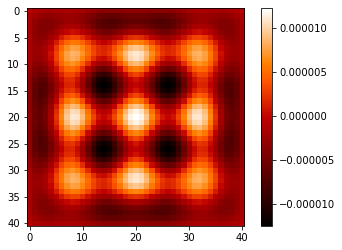

In [111]:
Ny = 41
Nx = 41

dx = 0.001
dy = 0.001
k = 6.28/0.012 #2pi/długość fali
n = np.ones((Nx,Ny))
f = np.zeros((Nx*Ny))
f[(Nx*Ny)//2] = 1
E_2D_test = np.zeros((Nx,Ny))

print('generating matrix...')
matrix = generateMatrix(Nx,Ny,dx,dy,n,k)

print('inverting sparse matrix...')

coordinates_x = np.zeros((Nx**2*Ny**2),dtype=np.int16)
coordinates_y = np.zeros((Nx**2*Ny**2),dtype=np.int16)

for i in range(Nx**2):
    coordinates_x[i*Nx**2:(i+1)*Nx**2] = np.ones(Nx**2,dtype=np.int16) * i

for i in range(Nx**2):
    coordinates_y[i*Nx**2:(i+1)*Nx**2] = np.arange(Nx**2, dtype=np.int16)

print(min(coordinates_x))
print(min(coordinates_y))

matrix_sparse = csc_matrix(
        (
            np.reshape(matrix,(1,Ny*Ny*Nx*Nx))[0],
            (
                coordinates_x,
                coordinates_y
            )
        )
        )

matrix_inv_sparse = sp.inv(
    matrix_sparse
    )

print('reshaping matrix...')
print(np.shape(matrix_inv_sparse.toarray()))

print('multiplication...')
E_test = matmul(matrix_inv_sparse.toarray(), f)

print('reshaping result...')
print(np.shape(E_test))

E_2D_test = np.reshape(E_test,(Nx,Ny))#[:(Nx-Ny)]
print('generate img...')

plt.imshow(E_2D_test, 'gist_heat')
# plt.imshow(matrix, 'gist_heat')
plt.colorbar()
print('saving img...')
plt.savefig('test_4.png')

# print('pseudoinverting matrix...')
# matrix_inv = pinv(matrix)         # Pseudoinverse


generating matrix...
pseudoinverting matrix...
reshaping matrix...
(1681, 1681)
multiplication...
reshaping result...
(1681,)
generate img...
saving img...


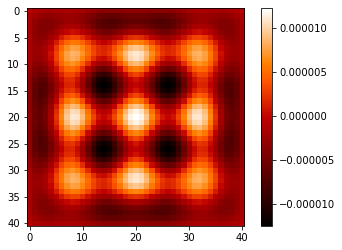

In [112]:
Ny = 41
Nx = 41

dx = 0.001
dy = 0.001
k = 6.28/0.012 #2pi/długość fali
n = np.ones((Nx,Ny))
f = np.zeros((Nx*Ny))
f[(Nx*Ny)//2] = 1
E_2D_test = np.zeros((Nx,Ny))

print('generating matrix...')
matrix = generateMatrix(Nx,Ny,dx,dy,n,k)

print('pseudoinverting matrix...')
matrix_inv = pinv(matrix)         # Pseudoinverse

print('reshaping matrix...')
print(np.shape(matrix_inv_sparse.toarray()))

print('multiplication...')
E_test = matmul(matrix_inv_sparse.toarray(), f)

print('reshaping result...')
print(np.shape(E_test))

E_2D_test = np.reshape(E_test,(Nx,Ny))#[:(Nx-Ny)]
print('generate img...')

plt.imshow(E_2D_test, 'gist_heat')
# plt.imshow(matrix, 'gist_heat')
plt.colorbar()
print('saving img...')
plt.savefig('test_5.png')



